In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pdfplumber
import pandas as pd
import matplotlib.pyplot as plt
import re
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

plt.style.use('default')

In [3]:
# Import our modules
from b_App.data_ingestion import  *
from b_App.data_processing import *
from b_App.visualizations import *
from a_Configs.config import *

budget_to_end_page = Config.ME_BUDGET_END_PAGES
budget_years = Config.NH_BUDGET_YEARS

In [4]:
from fredapi import Fred
fred = Fred(api_key=Config.FRED_API_KEY)


In [5]:
me_as_reported_df = load_me_budget_as_reported(budget_to_end_page, Config.DATA_DIR_ME)
me_processed_df = process_me_budget(me_as_reported_df)

In [6]:
plot_budget_and_spending(me_processed_df)

In [7]:
plot_small_departments_summary(me_processed_df)

,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027
Funding Source,,,,,,,,,,,,
FEDERAL EXPENDITURES FUND,2035.128390,2055.555394,2100.812805,2185.980072,2522.590122,2881.727266,3145.135310,3166.651132,3292.178239,3534.905849,3889.891453,3892.473179
GENERAL FUND,811.629906,808.286377,1168.639329,1247.537678,1326.123830,1266.190306,1265.338723,1638.181049,1750.751872,2077.100494,2183.726756,2164.550439
OTHER SPECIAL REVENUE,434.444201,437.289382,501.857500,512.318201,562.391259,574.845298,612.690128,661.347893,648.525893,720.657798,713.753039,721.184967
FEDERAL BLOCK GRANT FUND,153.885304,155.606745,181.301230,194.441203,214.270753,213.240371,224.817577,278.471607,279.653386,283.306083,278.836497,279.501104
FUND FOR A HEALTHY MAINE,50.183464,50.331314,52.352805,52.947924,64.429983,62.529614,49.226873,62.698209,61.562582,63.032048,63.811338,62.788713
FEDERAL EXPENDITURES FUND ARP,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.796206,23.532250,22.031838,17.220790,15.888726
FEDERAL EXPENDITURES FUND ARP SFR,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.415109,30.458835,12.513474,9.629802,9.629802,9.629802
MAINE RECOVERY FUND,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.150000,6.150000,6.150000
FEDERAL BLOCK GRANT FUND ARP,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,52.471957,52.187640,52.087561,7.527392,0.000500


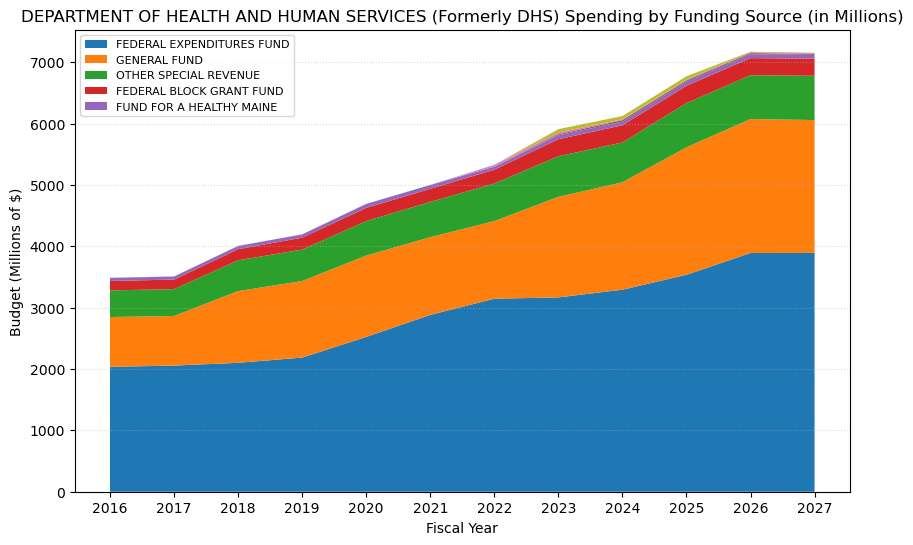

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_department_breakdown(ax, 'DEPARTMENT OF HEALTH AND HUMAN SERVICES (Formerly DHS)', me_processed_df, fred)

In [9]:
me_processed_df.sort_values(by='2024', ascending=False).head(10)

2016  \
Department                                         Funding Source                              
TOTAL                                              DEPARTMENT TOTAL             8.217277e+09   
                                                   DEPARTMENT TOTAL ex FEDERAL  5.488956e+09   
DEPARTMENT OF HEALTH AND HUMAN SERVICES (Former... DEPARTMENT TOTAL             3.486781e+09   
TOTAL                                              GENERAL FUND                 3.331299e+09   
                                                   FEDERAL EXPENDITURES FUND    2.728321e+09   
DEPARTMENT OF HEALTH AND HUMAN SERVICES (Former... FEDERAL EXPENDITURES FUND    2.035128e+09   
                                                   DEPARTMENT TOTAL ex FEDERAL  1.451653e+09   
DEPARTMENT OF EDUCATION                            DEPARTMENT TOTAL             1.432526e+09   
TOTAL                                              OTHER SPECIAL REVENUE        1.049691e+09   
DEPARTMENT OF EDUCATION                            DEPARTMENT TOTAL ex FEDERAL  1.209585e+09   

                                                                                        2017  \
Department                                         Funding Source                              
TOTAL                                              DEPARTMENT TOTAL             8.307662e+09   
                                                   DEPARTMENT TOTAL ex FEDERAL  5.560601e+09   
DEPARTMENT OF HEALTH AND HUMAN SERVICES (Former... DEPARTMENT TOTAL             3.508579e+09   
TOTAL                                              GENERAL FUND                 3.373180e+09   
                                                   FEDERAL EXPENDITURES FUND    2.747061e+09   
DEPARTMENT OF HEALTH AND HUMAN SERVICES (Former... FEDERAL EXPENDITURES FUND    2.055555e+09   
                                                   DEPARTMENT TOTAL ex FEDERAL  1.453024e+09   
DEPARTMENT OF EDUCATION                            DEPARTMENT TOTAL             1.445586e+09   
TOTAL                                              OTHER SPECIAL REVENUE        1.077801e+09   
DEPARTMENT OF EDUCATION                            DEPARTMENT TOTAL ex FEDERAL  1.222551e+09   

                                                                                        2018  \
Department                                         Funding Source                              
TOTAL                                              DEPARTMENT TOTAL             8.521222e+09   
                                                   DEPARTMENT TOTAL ex FEDERAL  5.730272e+09   
DEPARTMENT OF HEALTH AND HUMAN SERVICES (Former... DEPARTMENT TOTAL             4.006469e+09   
TOTAL                                              GENERAL FUND                 3.514674e+09   
                                                   FEDERAL EXPENDITURES FUND    2.790950e+09   
DEPARTMENT OF HEALTH AND HUMAN SERVICES (Former... FEDERAL EXPENDITURES FUND    2.100813e+09   
                                                   DEPARTMENT TOTAL ex FEDERAL  1.905657e+09   
DEPARTMENT OF EDUCATION                            DEPARTMENT TOTAL             1.529265e+09   
TOTAL                                              OTHER SPECIAL REVENUE        1.049875e+09   
DEPARTMENT OF EDUCATION                            DEPARTMENT TOTAL ex FEDERAL  1.295591e+09   

                                                                                        2019  \
Department                                         Funding Source                              
TOTAL                                              DEPARTMENT TOTAL             8.902010e+09   
                                                   DEPARTMENT TOTAL ex FEDERAL  6.021270e+09   
DEPARTMENT OF HEALTH AND HUMAN SERVICES (Former... DEPARTMENT TOTAL             4.194731e+09   
TOTAL                                              GENERAL FUND                 3.708230e+09   
                                                   FE

In [10]:
df = get_economic_indicators_df(fred)

In [11]:
df = df.div(df.iloc[:, 0], axis=0)

In [12]:
econ_index_df = produce_economic_index_df(fred)

In [13]:
plot_spending_vs_econ_index(me_processed_df.loc[('TOTAL', 'DEPARTMENT TOTAL')], econ_index_df)

In [14]:
produce_department_bar_chart(me_processed_df, '2027', top_n=3, produce_all_others=True)

In [15]:
df = me_processed_df
year = '2025'
to_exclude=['TOTAL']
top_n=5
produce_all_others=True

total_df = df.xs('DEPARTMENT TOTAL', level='Funding Source').fillna(0) / 1e9
total_for_year_df = total_df[year].sort_values(ascending=False)
total_with_exclusions = total_for_year_df[~total_for_year_df.index.isin(to_exclude)]
top_departments = total_with_exclusions.head(top_n)
if produce_all_others:
    others_sum = total_with_exclusions.iloc[top_n:].sum()
    top_departments = pd.concat([top_departments, pd.Series({'ALL OTHERS': others_sum})])

In [16]:
category_mapping_df = load_category_mapping(Config.CATEGORY_MAPPING_FILE)
nh_as_reported_df = load_nh_budget_as_reported(budget_years, Config.DATA_DIR_NH)

me_standardized_df = standardize_budget(me_processed_df, category_mapping_df, 'Maine')
nh_standardized_df = standardize_budget(nh_as_reported_df, category_mapping_df, 'New Hampshire')


In [18]:
create_state_comparison_through_time(me_standardized_df, nh_standardized_df, '2023', '2024')

ME                            NH  \
                                        End Arith Change % Change     End   
Department                                                                  
ADMINISTRATION & FINANCE             1068.0        374.0    53.9%   249.0   
AGRICULTURE & CONSERVATION            411.0        -31.0    -7.0%   385.0   
APPLIED EDUCATION                      19.0          4.0    26.7%     NaN   
ARTS & CULTURE                         13.0          5.0    62.5%     NaN   
ATTORNEY GENERAL                       50.0         -3.0    -5.7%   193.0   
CHILD WELFARE                           0.0          0.0     nan%     NaN   
COMMUNITY COLLEGES                    123.0         15.0    13.9%    64.0   
COMMUNITY DEVELOPMENT                   0.0          0.0     nan%     NaN   
CORRECTIONS                           218.0        -21.0    -8.8%   184.0   
ECONOMIC DEVELOPMENT                  240.0        129.0   116.2%   282.0   
EDUCATION                            2010.0       -133.0    -6.2%  2056.0   
ENERGY                                 61.0         18.0    41.9%   147.0   
ETHICS & ELECTIONS                      4.0          0.0     0.0%     NaN   
EXECUTIVE                              23.0          0.0     0.0%   294.0   
FINANCIAL & PROFESSIONAL REGULATION    58.0         17.0    41.5%    32.0   
FIRE                                    2.0          2.0     inf%     NaN   
FISH & WILDLIFE                        74.0         -6.0    -7.5%    93.0   
GOVERNMENT OVERSIGHT                    6.0          0.0     0.0%     NaN   
HEALTH & HUMAN SERVICES              5912.0       -214.0    -3.5%  4421.0   
HOUSING                               101.0          9.0     9.8%     NaN   
HUMAN RIGHTS                            4.0          0.0     0.0%     NaN   
INDUSTRY PROMOTION                      6.0          0.0     0.0%     NaN   
INFORMATION TECHNOLOGY                  0.0          0.0     nan%   118.0   
JUDICIAL                              109.0        -13.0   -10.7%   118.0   
JUDICIAL COUNCIL                       29.0        -17.0   -37.0%    46.0   
LABOR                                 325.0        -89.0   -21.5%   114.0   
LEGISLATIVE                            33.0          2.0     6.5%    41.0   
MEDICAL RESEARCH                        0.0          0.0     nan%     NaN   
MILITARY & VETERANS                    78.0          4.0     5.4%    57.0   
NATURAL & CULTURAL RESOURCES            7.0         -1.0   -12.5%   134.0   
POLICING                              135.0        -42.0   -23.7%   470.0   
RETIREMENT SYSTEM                       0.0         -6.0  -100.0%    73.0   
REVENUE ADMINISTRATION                  0.0          0.0     nan%    21.0   
SECRETARY OF STATE                     61.0         -5.0    -7.6%    18.0   
STATE HOUSE                             1.0          0.0     0.0%     NaN   
STATE LIBRARIES                         9.0          0.0     0.0%     NaN   
TELECOM                                13.0          5.0    62.5%     NaN   
TRANSPORTATION                        874.0       -385.0   -30.6%  1716.0   
TREASURY                              352.0        -25.0    -6.6%   307.0   
UNIVERSITY SYSTEM                     281.0        -11.0    -3.8%    98.0   
EXECUTIVE COUNCIL                       NaN          NaN     nan%     0.0   
LIQUOR COMMISSION                       NaN          NaN     nan%    97.0   
LOTTERY COMMISSION                      NaN          NaN     nan%    11.0   
STATE RUN ENTITIES                      NaN          NaN     nan%    11.0   

                                                             Diff  \
                                    Arith Change % Change     End   
Department                                                          
ADMINISTRATION & FINANCE                    -5.0    -2.0%   819.0   
AGRICULTURE & CONSERVATION                -104.0   -21.3%    26.0   
APPLIED EDUCATION                            NaN     nan%     NaN   
ARTS & 